# Practica Clustering k-means (Imagen Satelital)

### Mineria de Datos
#### Gerardo Luis Muriel

#### Problema
Clasificar una imagen satelital de acuerdo a la respuesta espectral de cada objeto en el suelo, en las bandas R,G,B,NIR

## 1-Importar librerias

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans # Para realizar clustering kmeans
import matplotlib.image as mpimg #Para leer las imagenes
from skimage import io

## 2-Importar los datos

#### Imagen 1 Sin NIR

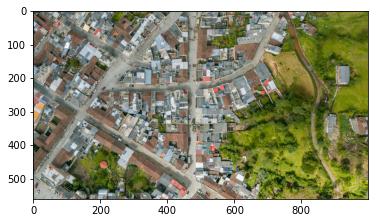

In [6]:
foto=mpimg.imread("data/serv-fotografia-aerea-v2.jpg")
plt.imshow(foto)

#### Imagen 2 con NIR

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(895, 1198, 3)

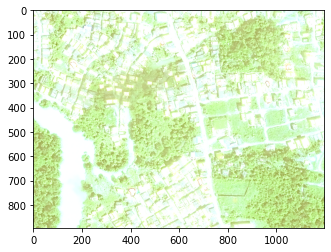

In [4]:
foto2=io.imread("data/ImagenQuibdo_RGB.tif")
plt.imshow(foto2)
foto2.shape

(895, 1198)

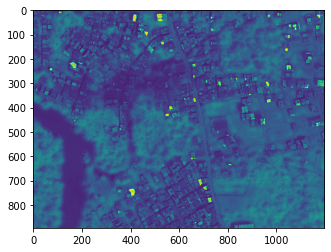

In [9]:
foto2nir=io.imread("data/ImagenQuibdo_NIR.tif")
plt.imshow(foto2nir)
foto2nir.shape

## 3-Preprocesamiento

### 3.1-Seleccionar conjunto de datos
Convertir la imagen en un dataframe

#### Imagen 1 Sin NIR

In [7]:
r = foto[:,:,0].reshape(foto.shape[0]*foto.shape[1],1)
g = foto[:,:,1].reshape(foto.shape[0]*foto.shape[1],1)
b = foto[:,:,2].reshape(foto.shape[0]*foto.shape[1],1)
dfimg = pd.DataFrame(np.concatenate((r,g,b),axis=1),columns=['Rojo','Verde','Azul'])
dfimg.head(10)

,Rojo,Verde,Azul
0,71,97,26
1,64,85,20
2,47,63,0
3,67,83,12
4,82,101,19
5,63,89,2
6,55,86,10
7,54,86,21
8,61,76,35
9,50,62,22


In [171]:
dfimg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561000 entries, 0 to 560999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   Rojo    561000 non-null  uint8
 1   Verde   561000 non-null  uint8
 2   Azul    561000 non-null  uint8
dtypes: uint8(3)
memory usage: 1.6 MB


#### Imagen 2 con NIR

In [10]:
r = foto2[:,:,0].reshape(foto2.shape[0]*foto2.shape[1],1)
g = foto2[:,:,1].reshape(foto2.shape[0]*foto2.shape[1],1)
b = foto2[:,:,2].reshape(foto2.shape[0]*foto2.shape[1],1)
nir = foto2nir.reshape(foto2nir.shape[0]*foto2nir.shape[1],1)
dfimg2 = pd.DataFrame(np.concatenate((r,g,b,nir),axis=1),columns=['Rojo','Verde','Azul','NIR'])
dfimg2.head(10)
#dfimg2.shape

,Rojo,Verde,Azul,NIR
0,224,276,237,342
1,215,266,225,325
2,206,256,211,307
3,203,252,207,300
4,241,312,273,399
5,338,460,442,643
6,330,448,428,624
7,309,416,390,571
8,280,372,339,499
9,250,327,288,425


### 3.2. Verificar si es necesario normalizar los datos

#### Imagen 1 Sin NIR

In [172]:
dfimg.describe()

,Rojo,Verde,Azul
count,561000.000000,561000.000000,561000.000000
mean,121.513324,123.123561,91.052317
std,46.959373,43.193638,60.448346
min,0.000000,0.000000,0.000000
25%,90.000000,93.000000,39.000000
50%,121.000000,121.000000,86.000000
75%,154.000000,153.000000,138.000000
max,255.000000,255.000000,255.000000


Normalizando los datos...

In [173]:
dfimg_norm=(dfimg-dfimg.min())/(dfimg.max()-dfimg.min())

In [174]:
dfimg_norm.describe()

,Rojo,Verde,Azul
count,561000.000000,561000.000000,561000.000000
mean,0.476523,0.482837,0.357068
std,0.184154,0.169387,0.237052
min,0.000000,0.000000,0.000000
25%,0.352941,0.364706,0.152941
50%,0.474510,0.474510,0.337255
75%,0.603922,0.600000,0.541176
max,1.000000,1.000000,1.000000


#### Imagen 2 con NIR

In [151]:
dfimg2.describe()


,Rojo,Verde,Azul,NIR
count,1.072210e+06,1.072210e+06,1.072210e+06,1.072210e+06
mean,2.465831e+02,3.169504e+02,2.482356e+02,5.476539e+02
std,1.022152e+02,1.509278e+02,1.672788e+02,2.306818e+02
min,9.900000e+01,9.100000e+01,1.000000e+00,1.000000e+00
25%,1.990000e+02,2.410000e+02,1.580000e+02,3.700000e+02
50%,2.200000e+02,2.770000e+02,2.020000e+02,5.440000e+02
75%,2.560000e+02,3.390000e+02,2.860000e+02,6.900000e+02
max,1.448000e+03,1.772000e+03,1.867000e+03,2.047000e+03


### 3.3-Analisis de componentes principales

#### Imagen 1 Sin NIR

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_dfimg = pca.fit_transform(dfimg)
pca_dfimg_df = pd.DataFrame(data = pca_dfimg,columns = ['PCA1','PCA2','PCA3'])


In [178]:
pca_dfimg_df.head(10)

,PCA1,PCA2,PCA3
0,-84.583759,-7.940684,-15.759872
1,-98.328342,-3.350912,-11.398630
2,-131.962990,0.887547,-6.525651
3,-103.261430,-9.927417,-8.330370
4,-81.648463,-20.738497,-12.072053
5,-109.358668,-17.435809,-15.975482
6,-109.523738,-5.996014,-18.446078
7,-102.436313,2.474936,-18.552935
8,-93.944314,12.885121,-5.726635
9,-115.633218,15.486473,-2.756049


#### Imagen 2 con NIR

In [13]:
pca2 = PCA(n_components=3)
pca_dfimg2 = pca2.fit_transform(dfimg2)
pca_dfimg_df2 = pd.DataFrame(data = pca_dfimg2,columns = ['PCA1','PCA2','PCA3'])

In [153]:
pca_dfimg_df2.head(10)

,PCA1,PCA2,PCA3
0,-165.954630,129.555815,-10.376632
1,-190.627279,130.783878,-11.457623
2,-216.959846,131.834363,-11.385224
3,-226.366314,133.004196,-11.770225
4,-88.353964,121.034087,-14.957850
5,256.104171,95.391503,-23.625395
6,228.492675,96.702790,-22.887330
7,153.112065,101.741766,-20.206954
8,50.624487,108.559976,-17.351677
9,-53.951706,116.264591,-15.354265


## 4-Visualizacion

#### Imagen 1 Sin NIR

Text(0, 0.5, 'PCA2')

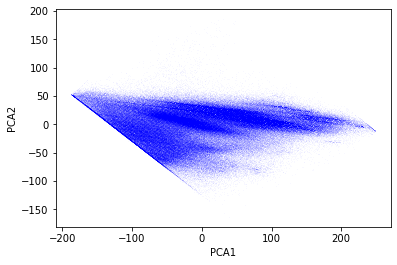

In [180]:
fig,ax=plt.subplots()

ax.scatter(x = pca_dfimg_df.PCA1, y = pca_dfimg_df.PCA2,c='blue',s=0.0001)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')


Text(0.5, 0, 'PCA3')

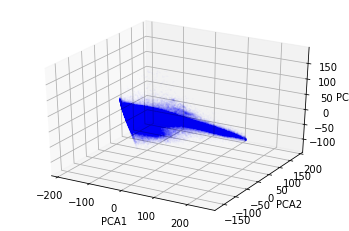

In [181]:
fig,ax=plt.subplots()
ax = plt.axes(projection ="3d")
ax.scatter3D(pca_dfimg_df.PCA1, pca_dfimg_df.PCA2, pca_dfimg_df.PCA3,c='blue',s=0.0001)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')


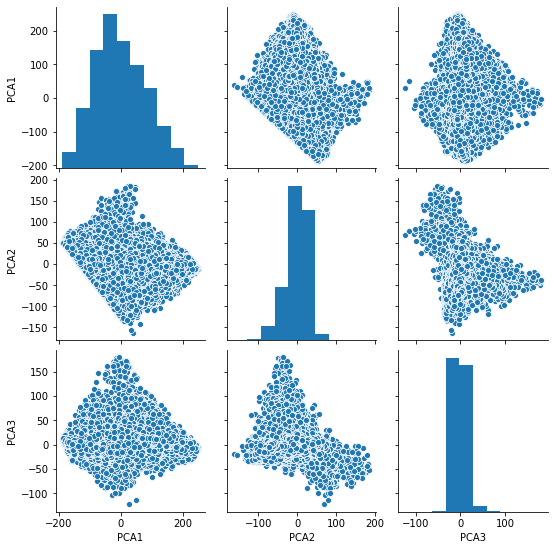

In [182]:
sns.pairplot(pca_dfimg_df)

#### Imagen 2 con NIR

Text(0, 0.5, 'PCA2')

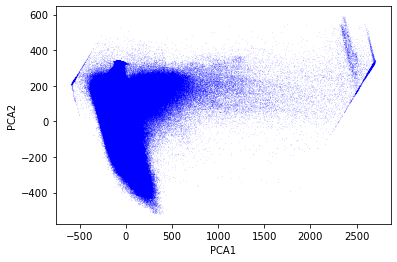

In [157]:
fig,ax=plt.subplots()

ax.scatter(x = pca_dfimg_df2.PCA1, y = pca_dfimg_df2.PCA2,c='blue',s=0.001)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')


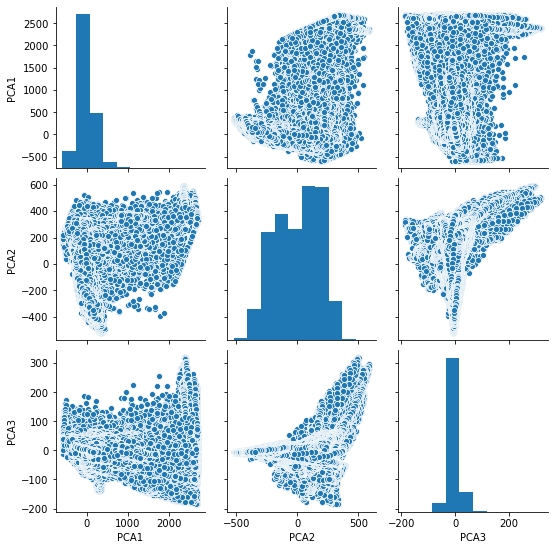

In [158]:
sns.pairplot(pca_dfimg_df2)

## 5-Definicion de numero de clases (k) optima 

Se hace empiricamente teniendo un amplio conocimiento de los datos, o si no realizando varias agrupaciones con diferentes numero de clases, y calculando el valor de "Variacion entre cluster", definido como:

$E=\sum_{i=1}^{k} \sum_{p \in C_{i}}dist(p,c_{i})^{2}$

$Donde:\\E: Suma\ del\ error\ cuadratico\\ p:\ es\ el\ punto\ que\ representa\ un\ dato\\ c_{i}\ es\ el\ centroide\ del\ agrupamiento\ C_{i}\\ k:\ es\ numero\ de\ agrupamientos\ $

#### Imagen 1 Sin NIR

In [183]:
ec=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters = i,max_iter = 300)
    kmeans.fit(pca_dfimg_df)
    ec.append(kmeans.inertia_)


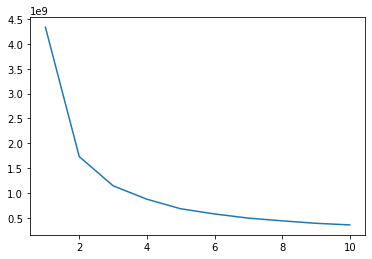

In [184]:
plt.plot(range(1,11),ec)

#### Imagen 2 con NIR

In [159]:
ec=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters = i,max_iter = 300)
    kmeans.fit(pca_dfimg_df2)
    ec.append(kmeans.inertia_)

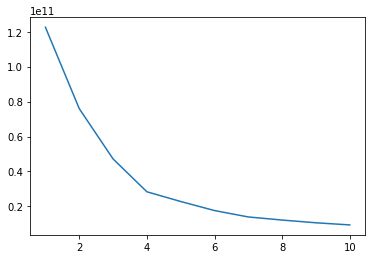

In [160]:
plt.plot(range(1,11),ec)

### 6-Creacion de Agrupamientos

#### Imagen 1 Sin NIR

In [185]:
kmeans = KMeans(n_clusters = 2,max_iter = 300)
kmeans.fit(pca_dfimg_df[['PCA1','PCA2','PCA3']])


KMeans(n_clusters=2)

In [186]:
pca_dfimg_df['grupo']=kmeans.labels_
pca_dfimg_df.head(10)

,PCA1,PCA2,PCA3,grupo
0,-84.583759,-7.940684,-15.759872,1
1,-98.328342,-3.350912,-11.398630,1
2,-131.962990,0.887547,-6.525651,1
3,-103.261430,-9.927417,-8.330370,1
4,-81.648463,-20.738497,-12.072053,1
5,-109.358668,-17.435809,-15.975482,1
6,-109.523738,-5.996014,-18.446078,1
7,-102.436313,2.474936,-18.552935,1
8,-93.944314,12.885121,-5.726635,1
9,-115.633218,15.486473,-2.756049,1


Text(0, 0.5, 'PCA2')

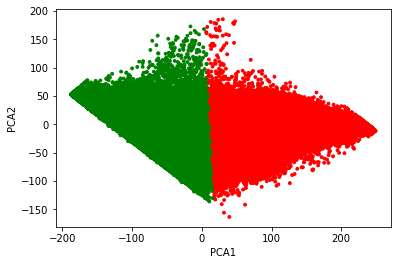

In [187]:
fig,ax=plt.subplots()

colores=np.array(['red','green'])
ax.scatter(x = pca_dfimg_df.PCA1, y = pca_dfimg_df.PCA2,c=colores[pca_dfimg_df.grupo],s=8)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')

#### Imagen 2 con NIR

In [161]:
kmeans = KMeans(n_clusters = 4,max_iter = 300)
kmeans.fit(pca_dfimg_df2[['PCA1','PCA2','PCA3']])


KMeans(n_clusters=4)

In [162]:
pca_dfimg_df2['grupo']=kmeans.labels_
pca_dfimg_df2.head(10)

,PCA1,PCA2,PCA3,grupo
0,-165.954630,129.555815,-10.376632,1
1,-190.627279,130.783878,-11.457623,1
2,-216.959846,131.834363,-11.385224,1
3,-226.366314,133.004196,-11.770225,1
4,-88.353964,121.034087,-14.957850,1
5,256.104171,95.391503,-23.625395,2
6,228.492675,96.702790,-22.887330,2
7,153.112065,101.741766,-20.206954,2
8,50.624487,108.559976,-17.351677,1
9,-53.951706,116.264591,-15.354265,1


Text(0, 0.5, 'PCA2')

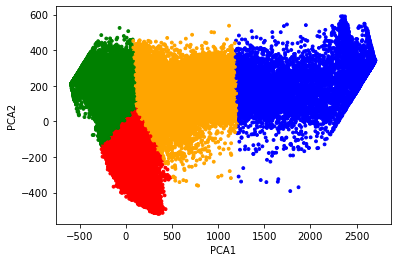

In [163]:
fig,ax=plt.subplots()

colores=np.array(['red','green','orange','blue'])
ax.scatter(x = pca_dfimg_df2.PCA1, y = pca_dfimg_df2.PCA2,c=colores[pca_dfimg_df2.grupo],s=8)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')

## 6-Visualizar las imagenes clasificadas

#### Imagen 1 Sin NIR

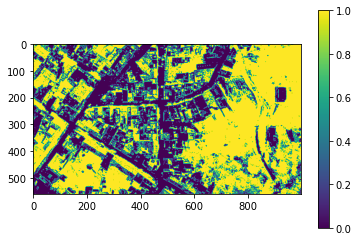

In [188]:
imagenclasificada=pca_dfimg_df['grupo'].values.reshape(foto.shape[0],foto.shape[1])
#imagen2clasificada
plt.imshow(imagenclasificada)
plt.colorbar()

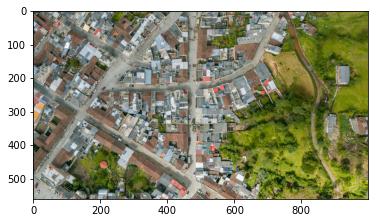

In [189]:
plt.imshow(foto)

#### Imagen 2 con NIR

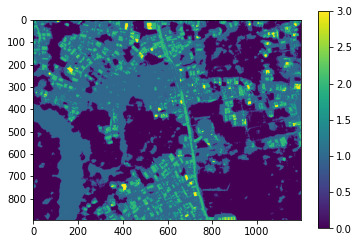

In [168]:
imagen2clasificada=pca_dfimg_df2['grupo'].values.reshape(foto2.shape[0],foto2.shape[1])
#imagen2clasificada
plt.imshow(imagen2clasificada)
plt.colorbar()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


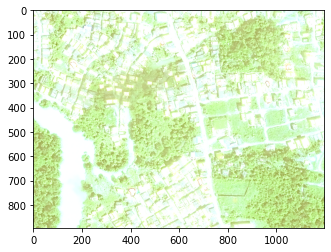

In [169]:
plt.imshow(foto2)

Posible mejoramiento de clasificacion: Incluir Indice de Vegetacion de diferencia Normalizada

In [14]:
pca_dfimg_df2['ndvi']=(dfimg2['NIR']-dfimg2['Rojo'])/(dfimg2['NIR']+dfimg2['Rojo'])

In [22]:
pca_dfimg_df2.describe()

,PCA1,PCA2,PCA3,ndvi,grupo_ndvi
count,1.072210e+06,1.072210e+06,1.072210e+06,1.072210e+06,1.072210e+06
mean,1.267947e-13,6.795848e-14,3.004676e-14,8.186735e+00,1.525741e+00
std,2.851772e+02,1.806308e+02,1.874927e+01,3.423088e+01,1.458429e+00
min,-5.980132e+02,-5.202896e+02,-1.857407e+02,0.000000e+00,0.000000e+00
25%,-1.474610e+02,-1.524539e+02,-6.916254e+00,2.214286e-01,0.000000e+00
50%,-3.529630e+01,1.787296e+01,1.246703e+00,4.076205e-01,1.000000e+00
75%,7.613581e+01,1.510506e+02,8.294749e+00,5.497487e-01,3.000000e+00
max,2.703006e+03,5.907413e+02,3.191730e+02,6.291731e+02,3.000000e+00


In [15]:
kmeans = KMeans(n_clusters = 4,max_iter = 300)
kmeans.fit(pca_dfimg_df2[['PCA1','ndvi']])

KMeans(n_clusters=4)

In [16]:
pca_dfimg_df2['grupo_ndvi']=kmeans.labels_

Text(0, 0.5, 'ndvi')

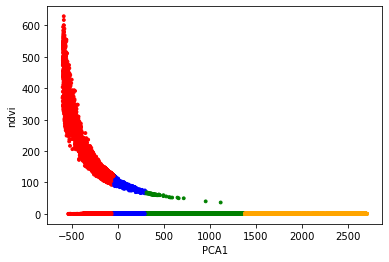

In [19]:
fig,ax=plt.subplots()

colores=np.array(['red','green','orange','blue'])
ax.scatter(x = pca_dfimg_df2.PCA1, y = pca_dfimg_df2.ndvi,c=colores[pca_dfimg_df2.grupo_ndvi],s=8)
ax.set_xlabel('PCA1')
ax.set_ylabel('ndvi')